In [46]:
import pandas as pd
import gpu_tracking as gt
import tifffile
data = tifffile.imread("0 (1).tif").astype("float32")

In [48]:
vid1 = data[:, 0, :, :].copy()
vid2 = data[:, 1, :, :].copy()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fefd9039e20>)

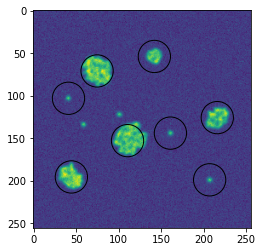

In [49]:
vid = vid1 + vid2
d = 38
df = gt.batch(vid, d, snr = 1.5)
gt.annotate_video(vid, df, r = d/2)

[src/gpu_setup.rs:744] start = 0.47712126


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feffa64c670>)

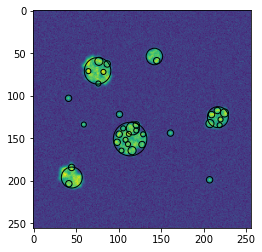

In [68]:
vid = vid2 + vid1
df = gt.LoG(vid, min_r = 3, max_r = 25, snr = 1.5, log_spacing = True, overlap_threshold = 0, search_range = 9)
gt.annotate_video(vid, df, frame = 0)